In [1]:
# import all the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import ttest_1samp, ttest_ind

In [2]:
# import CSVs
testSamples = pd.read_csv('testSamples.csv')
transData = pd.read_csv('transData.csv')

In [3]:
testSamples.head(10) # check

,sample_id,test_group
0,1,0
1,2,1
2,3,0
3,4,1
4,5,1
5,6,0
6,7,0
7,8,1
8,9,0
9,10,0


In [4]:
transData.head(10) # check

,transaction_id,sample_id,transaction_type,transaction_amount
0,52346326,11,REBILL,24.95
1,52346327,11,REBILL,24.95
2,52346328,32,REBILL,29.95
3,52346329,32,REBILL,29.95
4,52346330,32,REBILL,29.95
5,52346331,32,REBILL,29.95
6,52346332,103,REBILL,19.95
7,52346333,103,REBILL,19.95
8,52346334,103,REBILL,19.95
9,52346335,103,REBILL,19.95


In [5]:
testSamples.describe() # get a feel for the data

,sample_id,test_group
count,59721.00000,59721.000000
mean,29861.00000,0.248405
std,17240.11205,0.432092
min,1.00000,0.000000
25%,14931.00000,0.000000
50%,29861.00000,0.000000
75%,44791.00000,0.000000
max,59721.00000,1.000000


In [6]:
transData.describe() # get a feel for the data

,transaction_id,sample_id,transaction_amount
count,7.430000e+03,7430.000000,7430.000000
mean,5.235004e+07,30245.874024,24.935720
std,2.145001e+03,17064.733330,15.050653
min,5.234633e+07,11.000000,-39.950000
25%,5.234818e+07,15866.250000,24.950000
50%,5.235004e+07,30557.000000,24.950000
75%,5.235190e+07,44945.000000,32.950000
max,5.235376e+07,59694.000000,39.950000


In [7]:
# check for NAs
testSamples.isna().sum()

sample_id     0
test_group    0
dtype: int64

In [8]:
# check for NAs
transData.isna().sum()

transaction_id        0
sample_id             0
transaction_type      0
transaction_amount    0
dtype: int64

In [9]:
transData['transaction_type'].value_counts().head() # see how many of each transaction I have

REBILL        6961
REFUND         306
CHARGEBACK     163
Name: transaction_type, dtype: int64

## Q1: What is the aproximate probability distribution between the test group and the control group?

In [10]:
test_group = testSamples['test_group'].sum() # count total number of people in test group
total = testSamples['test_group'].shape[0] # get total number of people in both groups
probability_test = test_group/total # calculate the probability of being in the test group
probability_control = 1 - probability_test # calculated the probability distribution of control group substracted from 1
print("Test group probability: ", probability_test)
print("Control group probability: ", probability_control)

Test group probability:  0.24840508363892097
Control group probability:  0.751594916361079


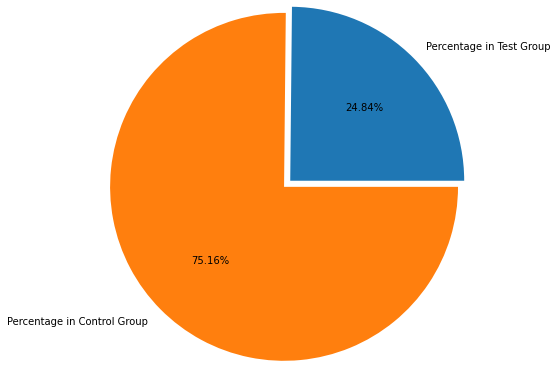

In [11]:
# make a pie chart to show the difference between the two groups
labels = 'Percentage in Test Group', 'Percentage in Control Group'
sizes = [probability_test, probability_control]

fig1, ax1 = plt.subplots()
explode = (0, 0.1) 
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',radius = 2)
 
plt.show()

## Q2: Is a user that must call-in to cancel *(test group)* more likely to generate at least 1 addition REBILL?

In [12]:
# merge datasets together
df = testSamples.merge(transData, on = 'sample_id', how = 'inner')
df.head(15)

,sample_id,test_group,transaction_id,transaction_type,transaction_amount
0,11,1,52346326,REBILL,24.95
1,11,1,52346327,REBILL,24.95
2,32,1,52346328,REBILL,29.95
3,32,1,52346329,REBILL,29.95
4,32,1,52346330,REBILL,29.95
5,32,1,52346331,REBILL,29.95
6,103,0,52346332,REBILL,19.95
7,103,0,52346333,REBILL,19.95
8,103,0,52346334,REBILL,19.95
9,103,0,52346335,REBILL,19.95


In [13]:
# Create transaction type cols
df1 = pd.get_dummies(df) # one hot encode 
df1.head(15) #check

,sample_id,test_group,transaction_id,transaction_amount,transaction_type_CHARGEBACK,transaction_type_REBILL,transaction_type_REFUND
0,11,1,52346326,24.95,0,1,0
1,11,1,52346327,24.95,0,1,0
2,32,1,52346328,29.95,0,1,0
3,32,1,52346329,29.95,0,1,0
4,32,1,52346330,29.95,0,1,0
5,32,1,52346331,29.95,0,1,0
6,103,0,52346332,19.95,0,1,0
7,103,0,52346333,19.95,0,1,0
8,103,0,52346334,19.95,0,1,0
9,103,0,52346335,19.95,0,1,0


In [14]:
# see how many enteries I have
df1.shape

(7430, 7)

In [15]:
# check to see how many NAs I have
df1.isna().sum()

sample_id                      0
test_group                     0
transaction_id                 0
transaction_amount             0
transaction_type_CHARGEBACK    0
transaction_type_REBILL        0
transaction_type_REFUND        0
dtype: int64

In [16]:
# group all data by ID so that way I can check and see how many Rebills there are per person
df2 = df1.groupby('sample_id')[['transaction_amount', 'transaction_type_CHARGEBACK', 'transaction_type_REBILL', 'transaction_type_REFUND']].sum()
df2 # check

,transaction_amount,transaction_type_CHARGEBACK,transaction_type_REBILL,transaction_type_REFUND
sample_id,,,,
11,49.90,0,2,0
32,119.80,0,4,0
103,219.45,0,11,0
109,19.95,0,1,0
127,65.90,0,2,0
...,...,...,...,...
59628,79.90,0,2,0
59631,-24.95,0,0,1
59654,79.90,0,2,0


In [17]:
# merge back the test_group col
df2 = pd.merge(left=df2, right=testSamples.loc[:,['sample_id','test_group']],how='left',left_index=True, right_on='sample_id').drop_duplicates()
df2 = df2[['sample_id','test_group','transaction_amount','transaction_type_CHARGEBACK','transaction_type_REBILL','transaction_type_REFUND']] # reorder coloumns

In [18]:
df2 # check it worked

,sample_id,test_group,transaction_amount,transaction_type_CHARGEBACK,transaction_type_REBILL,transaction_type_REFUND
10,11,1,49.90,0,2,0
31,32,1,119.80,0,4,0
102,103,0,219.45,0,11,0
108,109,0,19.95,0,1,0
126,127,0,65.90,0,2,0
...,...,...,...,...,...,...
59627,59628,1,79.90,0,2,0
59630,59631,1,-24.95,0,0,1
59653,59654,1,79.90,0,2,0
59688,59689,0,49.90,0,2,0


In [19]:
df2['additional_REBILL'] = df2['transaction_type_REBILL']> 1 # add a column wether a person had an additional rebill
df2

,sample_id,test_group,transaction_amount,transaction_type_CHARGEBACK,transaction_type_REBILL,transaction_type_REFUND,additional_REBILL
10,11,1,49.90,0,2,0,True
31,32,1,119.80,0,4,0,True
102,103,0,219.45,0,11,0,True
108,109,0,19.95,0,1,0,False
126,127,0,65.90,0,2,0,True
...,...,...,...,...,...,...,...
59627,59628,1,79.90,0,2,0,True
59630,59631,1,-24.95,0,0,1,False
59653,59654,1,79.90,0,2,0,True
59688,59689,0,49.90,0,2,0,True


In [20]:
df2.isna().sum() # check it if it worked

sample_id                      0
test_group                     0
transaction_amount             0
transaction_type_CHARGEBACK    0
transaction_type_REBILL        0
transaction_type_REFUND        0
additional_REBILL              0
dtype: int64

In [21]:
# create my sample groups
dfTest = df2.loc[df2['test_group'] == 1]
dfControl = df2.loc[df2['test_group'] == 0]

In [22]:
# turn my sample groups into an array
sample1 = dfTest['additional_REBILL'].values
sample2 = dfControl['additional_REBILL'].values
ttest_ind(sample1, sample2) # run the ttest to see if there is a behavior difference in the two groups

Ttest_indResult(statistic=-7.3234526875998425, pvalue=3.170332410615313e-13)

## Q3: Is a user that must call-in to cancel *(test group)* more likely to generate more revenue?

In [23]:
# sum up all the groups revenue (including the total so that way I can compare percentages)
testRevenue = round(dfTest['transaction_amount'].sum(),2)
controlRevenue = round(dfControl['transaction_amount'].sum(),2)
totalRevenue = round(df2['transaction_amount'].sum(),2)
# print out the total revenue
print("Test Revenue: ", testRevenue)
print("Control Revenue: ", controlRevenue)
print("Total Revenue: ", totalRevenue)

Test Revenue:  95433.5
Control Revenue:  89838.9
Total Revenue:  185272.4


In [24]:
# count how many people is in each group
totalPeopleTest = dfTest['sample_id'].count()
totalPeopleControl = dfControl['sample_id'].count()
totalPeopleTotal = df2['sample_id'].count()
# calculate how much revenue per person is generated
totalTestRevenuePerson = round(testRevenue/totalPeopleTest,2)
totalControlRevenuePerson = round(controlRevenue/totalPeopleTest,2)
# print out the revenue gernerated per person for each group
print("Test Revenue per person: ", totalTestRevenuePerson)
print("Control Revenue per person: ", totalControlRevenuePerson)

Test Revenue per person:  58.37
Control Revenue per person:  54.95


## Q4: Is a user that must call-in *(test group)* more likely to produce a higher chargeback rate(CHARGEBACKs/REBILLs)?

In [25]:
# calculate the how many CHARGEBACKs and REBILLs each group has
testChargeback = dfTest['transaction_type_CHARGEBACK'].sum()
testRebill = dfTest['transaction_type_REBILL'].sum()
controlChargeback = dfControl['transaction_type_CHARGEBACK'].sum()
controlRebill = dfControl['transaction_type_REBILL'].sum()

In [26]:
# calculate the chargeback rate for each group
testChargebackRate = testChargeback/testRebill
controlChargebackRate = controlChargeback/controlRebill

In [27]:
# print out the chargeback rate for each group
print("Chargeback Rate for test group is: ", testChargebackRate)
print("Chargeback Rate for control group is: ", controlChargebackRate)

Chargeback Rate for test group is:  0.017784711388455537
Chargeback Rate for control group is:  0.028221512247071354
